### Sales

In [19]:
import pandas as pd
import numpy as np
from tabulate import tabulate

sales_df = pd.read_csv('https://raw.githubusercontent.com/ricardoahumada/DataScienceBasics/refs/heads/main/data/company_sales/sales.csv')



In [20]:
# Columnas
sales_df.columns = ['orderNumber', 'orderLineNumber', 'orderDate', 'shippedDate', 'requiredDate', 'customerNumber',
                    'employeeNumber', 'productCode', 'status', 'comments', 'quantityOrdered', 'priceEach', 'sales_amount', 'origin']
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderNumber      3001 non-null   int64  
 1   orderLineNumber  3001 non-null   int64  
 2   orderDate        3001 non-null   object 
 3   shippedDate      2859 non-null   object 
 4   requiredDate     3001 non-null   object 
 5   customerNumber   3001 non-null   int64  
 6   employeeNumber   3001 non-null   int64  
 7   productCode      3001 non-null   object 
 8   status           3001 non-null   object 
 9   comments         759 non-null    object 
 10  quantityOrdered  3001 non-null   int64  
 11  priceEach        3001 non-null   float64
 12  sales_amount     3001 non-null   float64
 13  origin           3001 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 328.4+ KB


* Barras
* Scatter
* Histogramas
* Cajas

In [21]:
sales_df['status'].unique()

array(['Shipped', 'Resolved', 'Cancelled', 'On Hold', 'Disputed',
       'In Process'], dtype=object)

In [22]:
sales_df.groupby('status').agg(num=('status','count'))

,num
status,
Cancelled,79
Disputed,14
In Process,42
On Hold,44
Resolved,47
Shipped,2775


In [23]:
import matplotlib.pyplot as plt

             num
status          
Cancelled     79
Disputed      14
In Process    42
On Hold       44
Resolved      47
Shipped     2775


Text(0.5, 1.0, 'Conteo de Status')

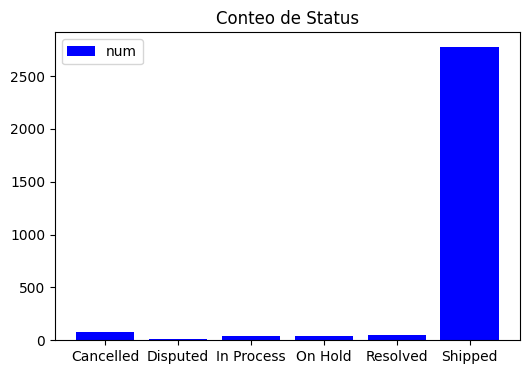

In [24]:
status_cats= sales_df.groupby('status').agg(num= ('status','count'))
print(status_cats)

fig, ax = plt.subplots(figsize = (6,4))
ax.bar(status_cats.index, status_cats['num'],color='blue',label='num')
ax.legend(loc='upper left')
ax.set_title('Conteo de Status')

<AxesSubplot: ylabel='num'>

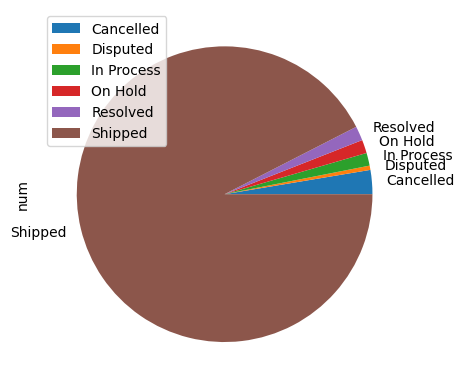

In [25]:
status_cats.plot(y='num', kind='pie')

<AxesSubplot: ylabel='num'>

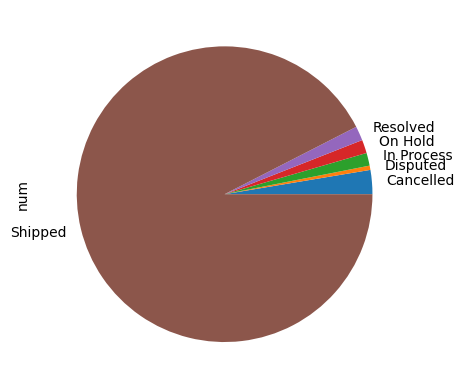

In [26]:
status_cats.plot(y='num', kind='pie',legend=False)

Relación de variables con sales_amount

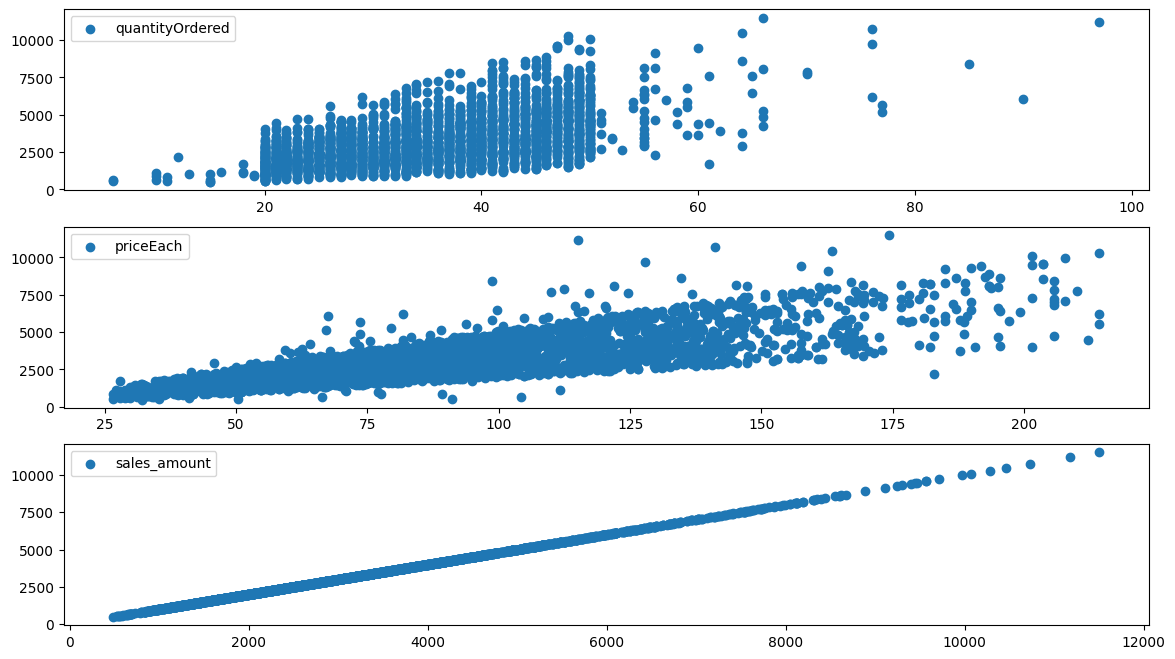

In [27]:

# scatter
variables = ['quantityOrdered', 'priceEach', 'sales_amount']

fig = plt.figure(figsize = (14, 8))

for i in range(0,3):
    fig.add_subplot(3, 1, i+1)
    ax = plt.scatter(sales_df[variables[i]], sales_df[variables[2]], label=variables[i])
    # plt.xlim(0.0, 100.0)
    plt.legend()
    
    
plt.show()

Distribución de datos

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


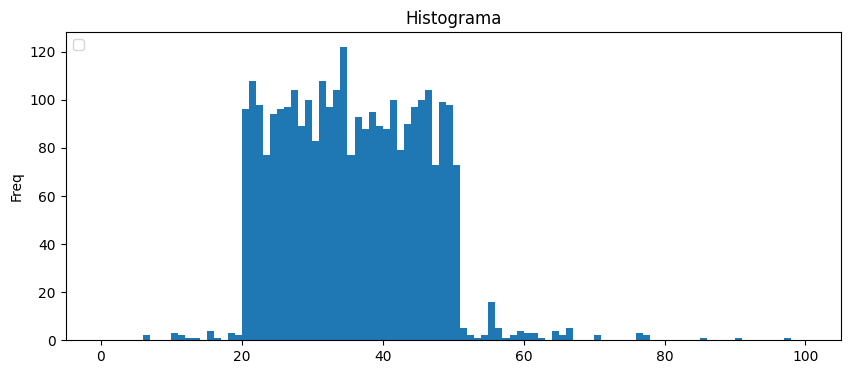

In [28]:

# dist quantityOrdered
quantityOrdered = sales_df['quantityOrdered']

labels = quantityOrdered.index
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(quantityOrdered, np.arange(0, 101))

ax.set_ylabel('Freq')
ax.set_title('Histograma')

plt.legend(loc='upper left')

<AxesSubplot: >

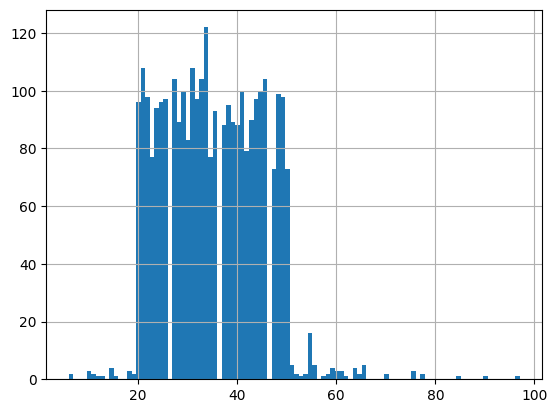

In [29]:
sales_df['quantityOrdered'].hist(bins=100)

Distribución de todas las variables

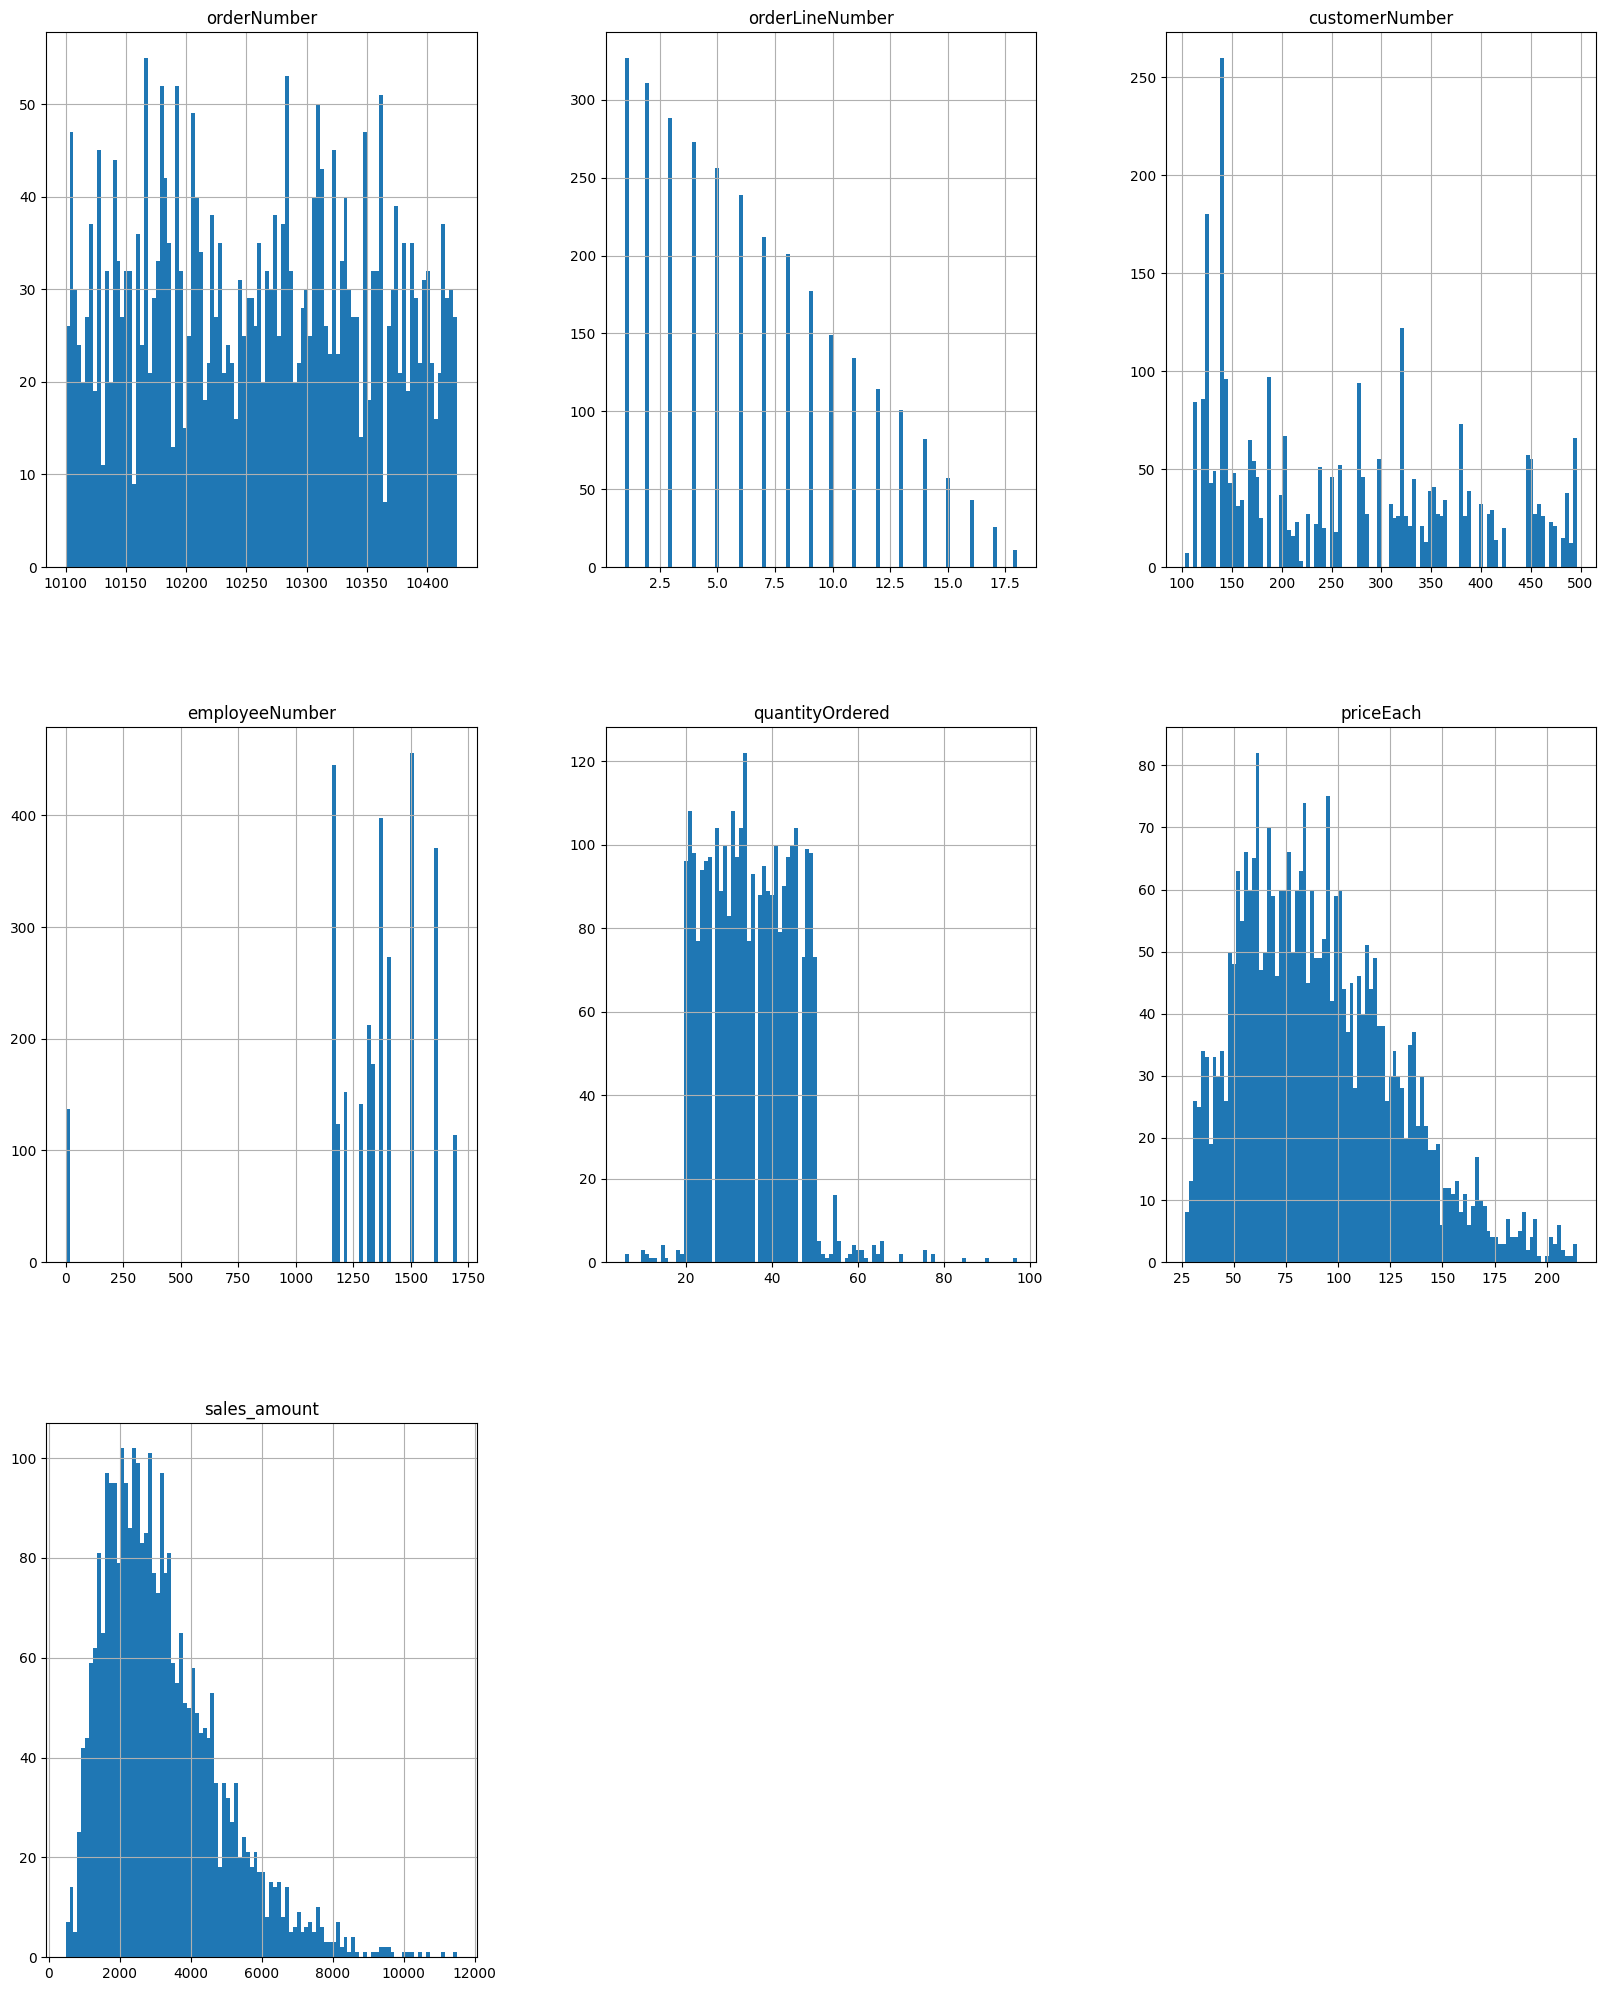

In [30]:

sales_df[sales_df['quantityOrdered'] >= 0].hist(bins=100, figsize=(20,25))
# plt.rcParams["figure.figsize"] = [20, 25]
plt.show()

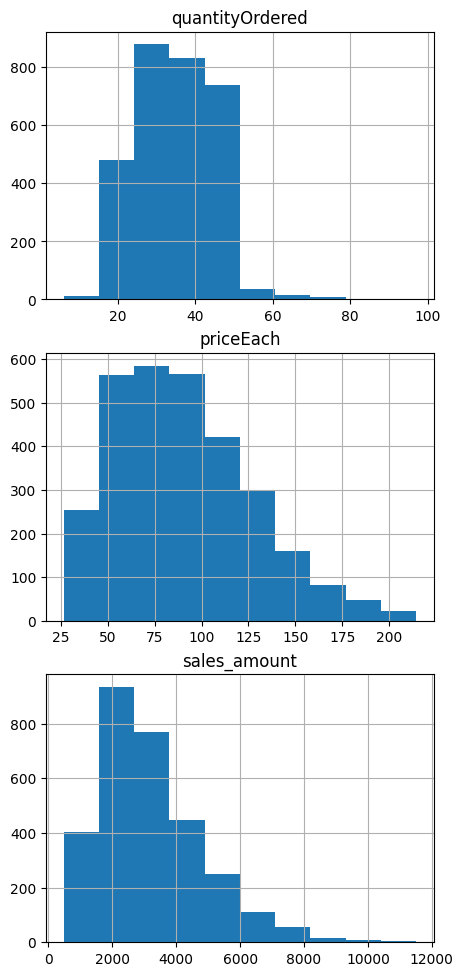

In [32]:
# histogramas concretos
fig = plt.figure(figsize=(5, 16))

for i, sc in enumerate(variables):
    fig.add_subplot(4, 1, i+1)
    ax = sales_df[sc].plot(kind='hist')
    #ax.set_xlim([0, 5])
    ax.set_ylabel('')
    ax.set_title(sc)
    ax.grid()
   
plt.show()

Identificar outliers

<AxesSubplot: >

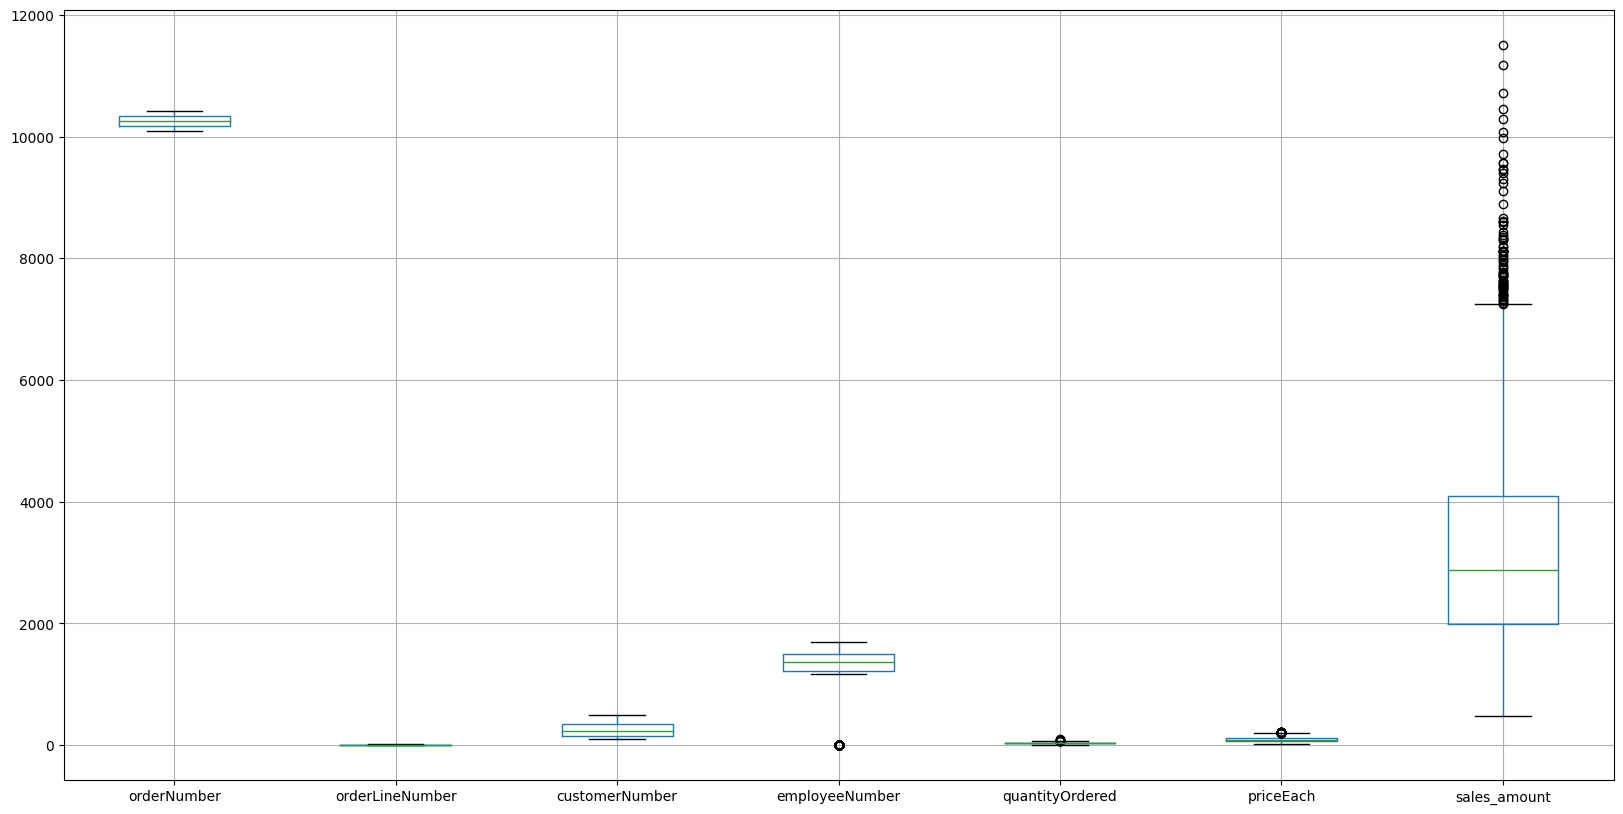

In [31]:

# box plot
sales_df.boxplot(return_type='axes',figsize=(20,10))

<AxesSubplot: >

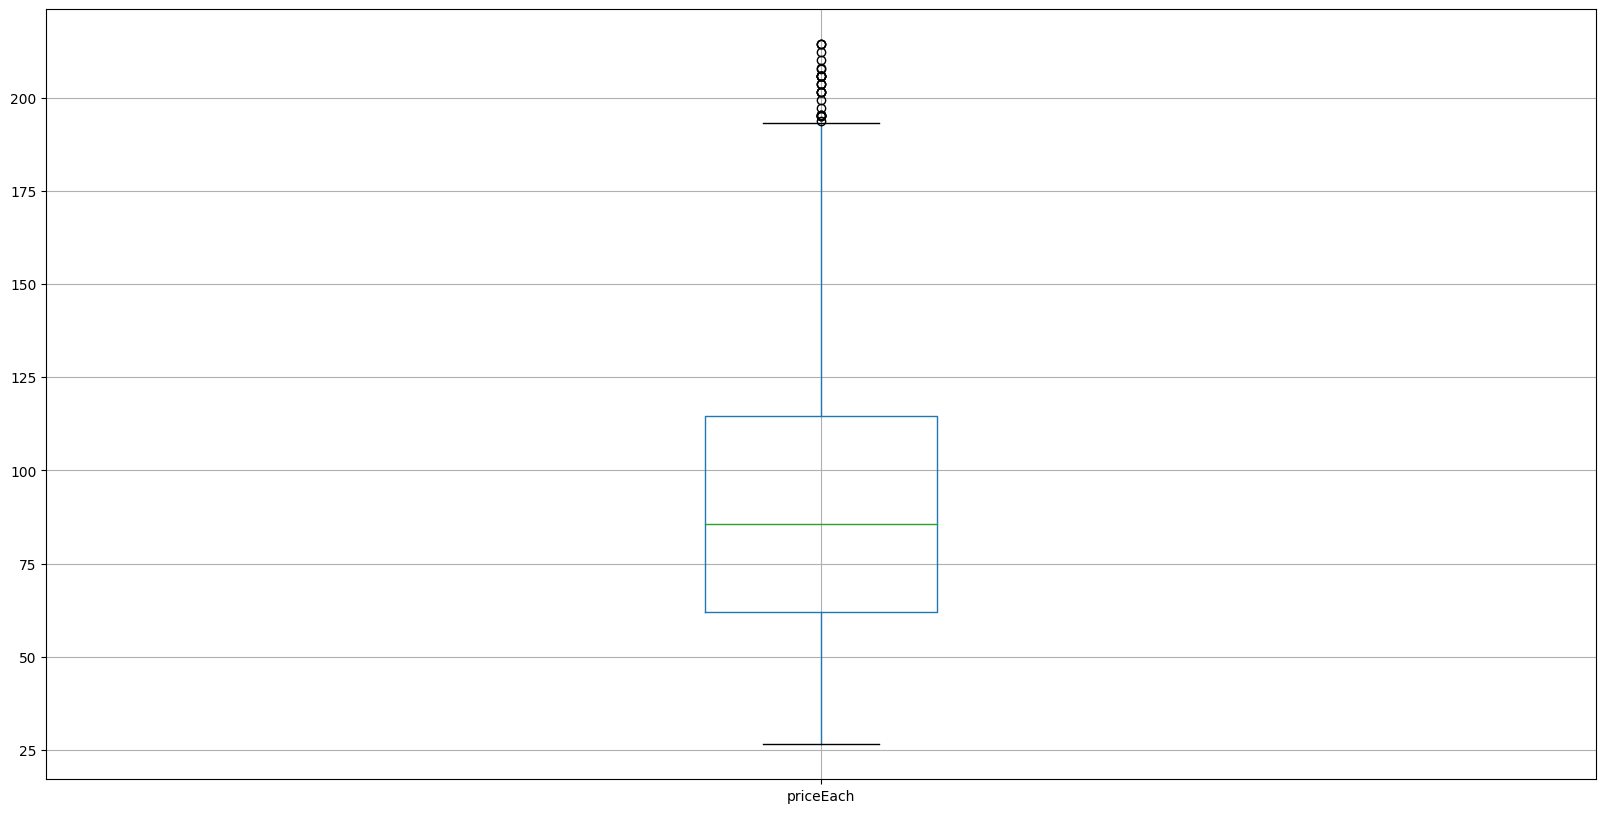

In [33]:
# solo price
sales_df[['priceEach']].boxplot(return_type='axes',figsize=(20,10))

Heatmaps

In [34]:

sales_corr = sales_df.corr('pearson', numeric_only=True)
sales_corr.style.background_gradient(cmap='Blues')

,orderNumber,orderLineNumber,customerNumber,employeeNumber,quantityOrdered,priceEach,sales_amount
orderNumber,1.000000,-0.050853,-0.000871,0.112239,0.077880,-0.003917,0.041960
orderLineNumber,-0.050853,1.000000,-0.043279,-0.012187,-0.020396,-0.018829,-0.034630
customerNumber,-0.000871,-0.043279,1.000000,0.069613,0.019246,-0.027937,-0.008249
employeeNumber,0.112239,-0.012187,0.069613,1.000000,-0.023855,-0.009872,-0.021265
quantityOrdered,0.077880,-0.020396,0.019246,-0.023855,1.000000,0.024733,0.575010
priceEach,-0.003917,-0.018829,-0.027937,-0.009872,0.024733,1.000000,0.803276
sales_amount,0.041960,-0.034630,-0.008249,-0.021265,0.575010,0.803276,1.000000


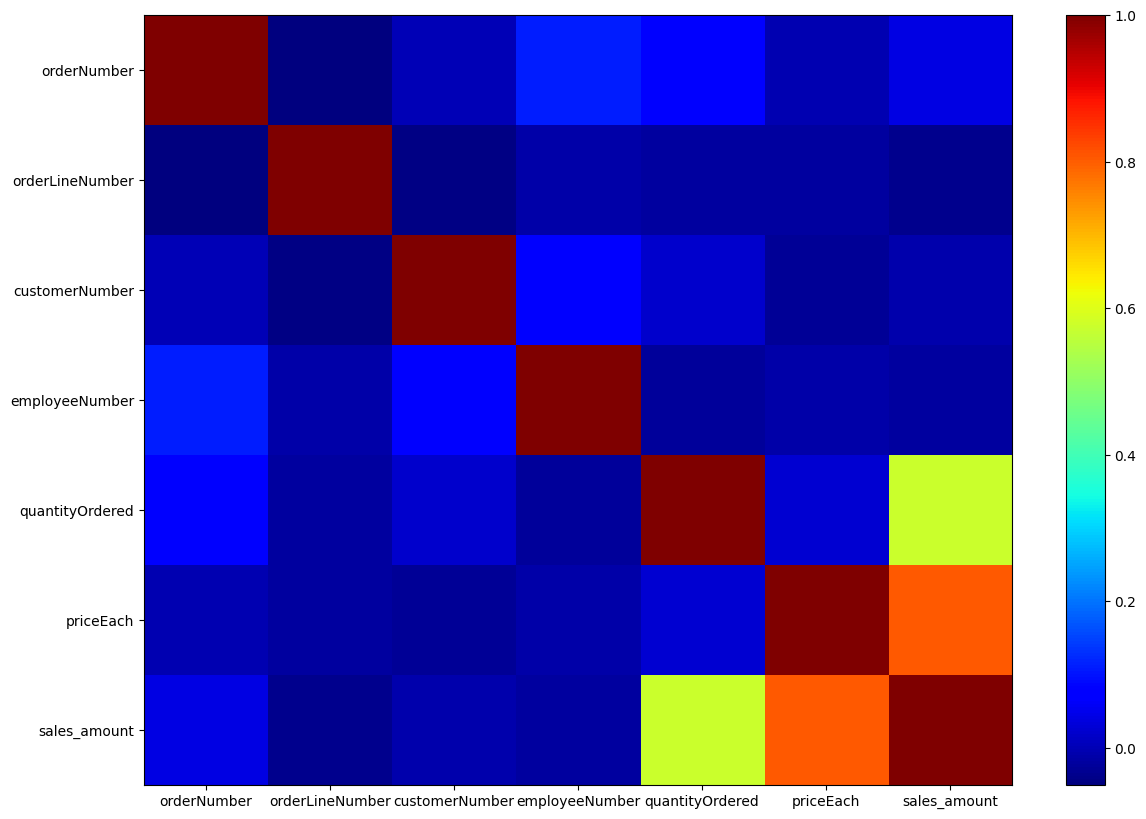

In [35]:
fig, ax = plt.subplots(figsize=(14, 10))
# fig.set_size_inches(32,5)

shw = ax.imshow(sales_corr, cmap='jet', aspect='auto')
bar = plt.colorbar(shw) 

# https://matplotlib.org/stable/users/explain/colors/colormaps.html
ax.set_yticks(np.arange(0, len(sales_corr.index), 1), sales_corr.index)
ax.set_xticks(np.arange(0, len(sales_corr.columns), 1), sales_corr.columns)

plt.show()